<a href="https://colab.research.google.com/github/hssitja/PhD-Dissertation/blob/Chapter-3/Chapter3-v0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First steps

Set packages

In [ ]:
# Install
!pip install geopandas
!pip install -U plotly

In [ ]:
# Import
import pandas as pd
import numpy as np
import os
from zipfile import ZipFile
import geopandas as gpd
import matplotlib.pyplot as plt

# Pandas graphics format
pd.options.plotting.backend = 'plotly'

Set data sources

In [ ]:
# Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# File's paths
folder = '/content/drive/MyDrive/3 Essay political economy COVID19/Dados/Eleitorais/'
file_results_2020 = os.path.join(folder, 'votacao_candidato_munzona_2020.zip')
file_results_2016 = os.path.join(folder, 'votacao_candidato_munzona_2016.zip')
file_results_2018 = os.path.join(folder, 'votacao_candidato_munzona_2018.zip')
file_candidates_2020 = os.path.join(folder, 'consulta_cand_2020.zip')
file_candidates_2016 = os.path.join(folder, 'consulta_cand_2016.zip')
file_ideology = os.path.join(folder,'partidos2020.csv')
arquivo_BR_municipios_shapefile = '/content/drive/MyDrive/3 Essay political economy COVID19/Dados/Mapa/BR_Municipios_2019.shp'

Dataset NPI 

In [ ]:
# Cities
df = pd.read_csv("https://raw.githubusercontent.com/hssitja/PhD-Dissertation/Chapter-3/Dataset_Port_and_Eng.csv")

df_codigbe = pd.read_csv(
    "https://raw.githubusercontent.com/hssitja/PhD-Dissertation/Chapter-3/c%C3%B3digos_tse_igbe.csv"
    ).rename(columns = {'codigo_ibge' : 'Unique_id'})

df = pd.merge(df, df_codigbe, on='Unique_id').rename(columns = {'Unique_id' : 'codigo_ibge'})


In [ ]:
# States
df_estados = pd.read_csv(
    "https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/ad2e4c65c6af2d10807cf1af4a84bc1a381164bc/data/OxCGRT_latest.csv"
    , low_memory=False)

df_estados = df_estados.loc[df_estados.CountryCode == 'BRA', :]

Elections dataset

In [ ]:
# global variables
LOCAL = 'BRASIL' # UF ou BRASIL
TIPO_CANDIDATO = 'Prefeito' #Vereador ou Prefeito

In [ ]:
# 2018 presidential elections runoff results

with ZipFile(file_results_2018) as z:
  with z.open(f'votacao_candidato_munzona_2018_{LOCAL}.csv') as f:
    results_2018 = pd.read_csv(f,sep=';',encoding='ISO-8859-1', decimal=','
    ).rename(columns = {'CD_MUNICIPIO' : 'codigo_tse'})

results_2018 = results_2018[results_2018['DS_CARGO'] == 'Presidente']

results_2018 = results_2018[results_2018['NR_TURNO'] == 2 ]

In [ ]:
# grouping results by city

results_2018 = results_2018.groupby(['codigo_tse','NM_URNA_CANDIDATO']).agg(
        { 'QT_VOTOS_NOMINAIS':'sum'})

results_2018 = results_2018.pivot_table('QT_VOTOS_NOMINAIS', "codigo_tse", "NM_URNA_CANDIDATO")

In [ ]:
# calculating the voting share

results_2018['Haddad_share'] = (
    results_2018['FERNANDO HADDAD'] / (results_2018['FERNANDO HADDAD'] + results_2018['JAIR BOLSONARO'])
    )

results_2018['Bolsonaro_share'] = (
    results_2018['JAIR BOLSONARO'] / (results_2018['FERNANDO HADDAD'] + results_2018['JAIR BOLSONARO'])
    )

df = pd.merge(df, results_2018, on='codigo_tse')

In [ ]:
# 2020 local elections

with ZipFile(file_results_2020) as z:
  with z.open(f'votacao_candidato_munzona_2020_{LOCAL}.csv') as f:
    results_2020 = pd.read_csv(f,sep=';',encoding='ISO-8859-1', decimal=','
    ).rename(columns = {'CD_MUNICIPIO' : 'codigo_tse'})

In [ ]:
results_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977661 entries, 0 to 977660
Data columns (total 38 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   DT_GERACAO                977661 non-null  object
 1   HH_GERACAO                977661 non-null  object
 2   ANO_ELEICAO               977661 non-null  int64 
 3   CD_TIPO_ELEICAO           977661 non-null  int64 
 4   NM_TIPO_ELEICAO           977661 non-null  object
 5   NR_TURNO                  977661 non-null  int64 
 6   CD_ELEICAO                977661 non-null  int64 
 7   DS_ELEICAO                977661 non-null  object
 8   DT_ELEICAO                977661 non-null  object
 9   TP_ABRANGENCIA            977661 non-null  object
 10  SG_UF                     977661 non-null  object
 11  SG_UE                     977661 non-null  int64 
 12  NM_UE                     977661 non-null  object
 13  codigo_tse                977661 non-null  int64 
 14  NM_M

In [ ]:
# Getting candidates info

with ZipFile(file_candidates_2020) as z:
  with z.open(f'consulta_cand_2020_{LOCAL}.csv') as f:
    candidates_2020 = pd.read_csv(f,sep=';',encoding='ISO-8859-1', decimal=',', low_memory=False)

In [ ]:
# Droping duplicates (drop first round when there was runoff)

candidates_2020 = candidates_2020.sort_values(by='NR_TURNO', ascending=False)\
.drop_duplicates(subset=['SQ_CANDIDATO'], keep='first')

In [ ]:
candidates_2020.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'NR_TURNO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO',
       'TP_ABRANGENCIA', 'SG_UF', 'SG_UE', 'NM_UE', 'CD_CARGO', 'DS_CARGO',
       'SQ_CANDIDATO', 'NR_CANDIDATO', 'NM_CANDIDATO', 'NM_URNA_CANDIDATO',
       'NM_SOCIAL_CANDIDATO', 'NR_CPF_CANDIDATO', 'NM_EMAIL',
       'CD_SITUACAO_CANDIDATURA', 'DS_SITUACAO_CANDIDATURA',
       'CD_DETALHE_SITUACAO_CAND', 'DS_DETALHE_SITUACAO_CAND', 'TP_AGREMIACAO',
       'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO', 'SQ_COLIGACAO',
       'NM_COLIGACAO', 'DS_COMPOSICAO_COLIGACAO', 'CD_NACIONALIDADE',
       'DS_NACIONALIDADE', 'SG_UF_NASCIMENTO', 'CD_MUNICIPIO_NASCIMENTO',
       'NM_MUNICIPIO_NASCIMENTO', 'DT_NASCIMENTO', 'NR_IDADE_DATA_POSSE',
       'NR_TITULO_ELEITORAL_CANDIDATO', 'CD_GENERO', 'DS_GENERO',
       'CD_GRAU_INSTRUCAO', 'DS_GRAU_INSTRUCAO', 'CD_ESTADO_CIVIL',
       'DS_ESTADO_CIVIL', 'CD_COR_RACA', 'DS_COR_RACA', 'CD_OCUPACAO',
       '

In [ ]:
candidates_2020['DS_SIT_TOT_TURNO'].unique()

array(['NÃO ELEITO', 'ELEITO', 'SUPLENTE', 'ELEITO POR QP',
       'ELEITO POR MÉDIA', '#NULO#'], dtype=object)

In [ ]:
# Summing total votes by cities/round for each city

results_2020['QT_VOTOS_VALIDOS'] = results_2020.groupby(['codigo_tse', 'NR_TURNO','DS_CARGO'])['QT_VOTOS_NOMINAIS'].transform('sum')

In [ ]:
# Calculating total votes by each candidate and droping first round when there were run off

top_candidates_2020 = results_2020[results_2020['DS_CARGO']== TIPO_CANDIDATO]\
.sort_values(by='NR_TURNO',ascending=False)\
.groupby(['NR_CANDIDATO','codigo_tse','NR_TURNO'])\
.agg({'NM_URNA_CANDIDATO' :'first', 'NM_CANDIDATO':'first', 'NM_MUNICIPIO' :'first',  
      'DS_SIT_TOT_TURNO' :'first', 'NR_PARTIDO' :'first', 'SG_PARTIDO' :'first',
      'SQ_CANDIDATO': 'first', 'QT_VOTOS_NOMINAIS' : 'sum' , 'QT_VOTOS_VALIDOS':'first', 'DS_SIT_TOT_TURNO':'first'})\
      .sort_values(by='QT_VOTOS_NOMINAIS',ascending=False)\
      .drop_duplicates(subset=['SQ_CANDIDATO'], keep='first')

In [ ]:
# adding voting share

top_candidates_2020['PERCENTUAL'] = top_candidates_2020['QT_VOTOS_NOMINAIS'] / top_candidates_2020['QT_VOTOS_VALIDOS']

In [ ]:
# Slicing to consider only the two most voted

top_candidates_2020 = top_candidates_2020.groupby(['codigo_tse']).head(2)

In [ ]:
top_candidates_2020

,,,NM_URNA_CANDIDATO,NM_CANDIDATO,NM_MUNICIPIO,DS_SIT_TOT_TURNO,NR_PARTIDO,SG_PARTIDO,SQ_CANDIDATO,QT_VOTOS_NOMINAIS,QT_VOTOS_VALIDOS,PERCENTUAL
NR_CANDIDATO,codigo_tse,NR_TURNO,,,,,,,,,,
45,71072,2,BRUNO COVAS,BRUNO COVAS LOPES,SÃO PAULO,ELEITO,45,PSDB,250000896546,3169121,5337230,0.593776
50,71072,2,GUILHERME BOULOS,GUILHERME CASTRO BOULOS,SÃO PAULO,NÃO ELEITO,50,PSOL,250000746936,2168109,5337230,0.406224
25,60011,2,EDUARDO PAES,EDUARDO DA COSTA PAES,RIO DE JANEIRO,ELEITO,25,DEM,190000688286,1629319,2543019,0.640703
10,60011,2,CRIVELLA,MARCELO BEZERRA CRIVELLA,RIO DE JANEIRO,NÃO ELEITO,10,REPUBLICANOS,190000684240,913700,2543019,0.359297
55,41238,1,KALIL,ALEXANDRE KALIL,BELO HORIZONTE,ELEITO,55,PSD,130000756879,784307,1237764,0.633648
...,...,...,...,...,...,...,...,...,...,...,...,...
20,61468,1,TIÃO LIMA,SEBASTIÃO DE LIMA,UBARANA,NÃO ELEITO,20,PSC,250001231491,55,1561,0.035234
19,74055,1,MARLENE,MARLENE SOARES GWAK,AGUDOS DO SUL,NÃO ELEITO,19,PODE,160001188499,52,2903,0.017913
15,13773,1,VERINHA VERAS,VERA LUCIA ARAUJO VERAS,CHAVAL,NÃO ELEITO,15,MDB,60000914717,45,5216,0.008627


In [ ]:
top_candidates_2020 = top_candidates_2020.reset_index()

In [ ]:
# Getting and merging reelection info

top_candidates_2020 = pd.merge(top_candidates_2020, candidates_2020[['SQ_CANDIDATO', 'ST_REELEICAO']], on='SQ_CANDIDATO', how='left')

In [ ]:
top_candidates_2020

,NR_CANDIDATO,codigo_tse,NR_TURNO,NM_URNA_CANDIDATO,NM_CANDIDATO,NM_MUNICIPIO,DS_SIT_TOT_TURNO,NR_PARTIDO,SG_PARTIDO,SQ_CANDIDATO,QT_VOTOS_NOMINAIS,QT_VOTOS_VALIDOS,PERCENTUAL,ST_REELEICAO
0,45,71072,2,BRUNO COVAS,BRUNO COVAS LOPES,SÃO PAULO,ELEITO,45,PSDB,250000896546,3169121,5337230,0.593776,N
1,50,71072,2,GUILHERME BOULOS,GUILHERME CASTRO BOULOS,SÃO PAULO,NÃO ELEITO,50,PSOL,250000746936,2168109,5337230,0.406224,N
2,25,60011,2,EDUARDO PAES,EDUARDO DA COSTA PAES,RIO DE JANEIRO,ELEITO,25,DEM,190000688286,1629319,2543019,0.640703,N
3,10,60011,2,CRIVELLA,MARCELO BEZERRA CRIVELLA,RIO DE JANEIRO,NÃO ELEITO,10,REPUBLICANOS,190000684240,913700,2543019,0.359297,N
4,55,41238,1,KALIL,ALEXANDRE KALIL,BELO HORIZONTE,ELEITO,55,PSD,130000756879,784307,1237764,0.633648,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10954,20,61468,1,TIÃO LIMA,SEBASTIÃO DE LIMA,UBARANA,NÃO ELEITO,20,PSC,250001231491,55,1561,0.035234,N
10955,19,74055,1,MARLENE,MARLENE SOARES GWAK,AGUDOS DO SUL,NÃO ELEITO,19,PODE,160001188499,52,2903,0.017913,N
10956,15,13773,1,VERINHA VERAS,VERA LUCIA ARAUJO VERAS,CHAVAL,NÃO ELEITO,15,MDB,60000914717,45,5216,0.008627,N
10957,55,27154,1,FLAVIO BARBOSA,FLAVIO JOSE DE MATOS BARBOSA,BELÉM,NÃO ELEITO,55,PSD,20000856823,32,2192,0.014599,N


In [ ]:
# Ideology data

parties = pd.read_csv(file_ideology)
ideology = pd.CategoricalDtype(categories=['direita', 'centro', 'esquerda'], ordered=True)
parties['Espectro'] = parties['Espectro'].astype(ideology)

In [ ]:
top_candidates_2020 = top_candidates_2020.merge(parties[['NR_PARTIDO','Espectro']], left_on='NR_PARTIDO',right_on='NR_PARTIDO')

In [ ]:
# Getting the winner...

winner_2020 = top_candidates_2020[top_candidates_2020['DS_SIT_TOT_TURNO'] == 'ELEITO']
winner_2020 = winner_2020[['codigo_tse','NM_URNA_CANDIDATO', 'NM_CANDIDATO', 'SQ_CANDIDATO', 'ST_REELEICAO', 'SG_PARTIDO', 'Espectro','QT_VOTOS_NOMINAIS', 'PERCENTUAL']].rename(columns = {
    'NM_URNA_CANDIDATO' : 'ELEITO_NM_URNA_CANDIDATO', 'SQ_CANDIDATO' : 'ELEITO_SQ_CANDIDATO', 'ST_REELEICAO' : 'ELEITO_ST_REELEICAO',
    'NM_CANDIDATO' : 'ELEITO_NM_CANDIDATO', 'SG_PARTIDO' : 'ELEITO_SG_PARTIDO', 'Espectro' : 'ELEITO_Espectro', 'QT_VOTOS_NOMINAIS': 'ELEITO_QT_VOTOS_NOMINAIS', 'PERCENTUAL': 'ELEITO_PERCENTUAL'})

In [ ]:
# ... and the runner up

runnerup_2020 = top_candidates_2020[top_candidates_2020['DS_SIT_TOT_TURNO'] == 'NÃO ELEITO']
runnerup_2020 = runnerup_2020[['codigo_tse','NM_URNA_CANDIDATO', 'NM_CANDIDATO', 'SQ_CANDIDATO', 'ST_REELEICAO', 'SG_PARTIDO', 'Espectro' ,'QT_VOTOS_NOMINAIS', 'PERCENTUAL']].rename(columns = {
    'NM_URNA_CANDIDATO' : 'N_ELEITO_NM_URNA_CANDIDATO', 'SQ_CANDIDATO' : 'N_ELEITO_SQ_CANDIDATO','ST_REELEICAO' : 'N_ELEITO_ST_REELEICAO',
    'NM_CANDIDATO' : 'N_ELEITO_NM_CANDIDATO', 'SG_PARTIDO' : 'N_ELEITO_SG_PARTIDO', 'Espectro' : 'N_ELEITO_espectro','QT_VOTOS_NOMINAIS': 'N_ELEITO_QT_VOTOS_NOMINAIS', 'PERCENTUAL': 'N_ELEITO_PERCENTUAL'})

In [ ]:
# 2016 local elections

with ZipFile(file_results_2016) as z:
  with z.open(f'votacao_candidato_munzona_2016_{LOCAL}.csv') as f:
    results_2016 = pd.read_csv(f,sep=';',encoding='ISO-8859-1', decimal=','
    ).rename(columns = {'CD_MUNICIPIO' : 'codigo_tse'})

In [ ]:
results_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940022 entries, 0 to 940021
Data columns (total 38 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   DT_GERACAO                940022 non-null  object
 1   HH_GERACAO                940022 non-null  object
 2   ANO_ELEICAO               940022 non-null  int64 
 3   CD_TIPO_ELEICAO           940022 non-null  int64 
 4   NM_TIPO_ELEICAO           940022 non-null  object
 5   NR_TURNO                  940022 non-null  int64 
 6   CD_ELEICAO                940022 non-null  int64 
 7   DS_ELEICAO                940022 non-null  object
 8   DT_ELEICAO                940022 non-null  object
 9   TP_ABRANGENCIA            940022 non-null  object
 10  SG_UF                     940022 non-null  object
 11  SG_UE                     940022 non-null  int64 
 12  NM_UE                     940022 non-null  object
 13  codigo_tse                940022 non-null  int64 
 14  NM_M

In [ ]:
# Getting candidates info

with ZipFile(file_candidates_2016) as z:
  with z.open(f'consulta_cand_2016_{LOCAL}.csv') as f:
    candidates_2016 = pd.read_csv(f,sep=';',encoding='ISO-8859-1', decimal=',', low_memory=False)

In [ ]:
# Droping duplicates (drop first round when there was runoff)

candidates_2016 = candidates_2016.sort_values(by='NR_TURNO', ascending=False)\
.drop_duplicates(subset=['SQ_CANDIDATO'], keep='first')

In [ ]:
# Summing total votes by cities/round for each city

results_2016['QT_VOTOS_VALIDOS'] = results_2016.groupby(['codigo_tse', 'NR_TURNO','DS_CARGO'])['QT_VOTOS_NOMINAIS'].transform('sum')

In [ ]:
# Calculating total votes by each candidate and droping first round when there were run off

top_candidates_2016 = results_2016[results_2016['DS_CARGO']== TIPO_CANDIDATO]\
.sort_values(by='NR_TURNO',ascending=False)\
.groupby(['NR_CANDIDATO','codigo_tse','NR_TURNO'])\
.agg({'NM_URNA_CANDIDATO' :'first', 'NM_CANDIDATO':'first', 'NM_MUNICIPIO' :'first',  
      'DS_SIT_TOT_TURNO' :'first', 'NR_PARTIDO' :'first', 'SG_PARTIDO' :'first',
      'SQ_CANDIDATO': 'first', 'QT_VOTOS_NOMINAIS' : 'sum' , 'QT_VOTOS_VALIDOS':'first', 'DS_SIT_TOT_TURNO':'first'})\
      .sort_values(by='QT_VOTOS_NOMINAIS',ascending=False)\
      .drop_duplicates(subset=['SQ_CANDIDATO'], keep='first')

In [ ]:
# adding voting share

top_candidates_2016['PERCENTUAL'] = top_candidates_2016['QT_VOTOS_NOMINAIS'] / top_candidates_2016['QT_VOTOS_VALIDOS']

In [ ]:
# Slicing to consider only the two most voted

top_candidates_2016['DS_SIT_TOT_TURNO'] = top_candidates_2016['DS_SIT_TOT_TURNO'].dropna() 

top_candidates_2016 = top_candidates_2016[top_candidates_2016['DS_SIT_TOT_TURNO'] == 'ELEITO']

In [ ]:
top_candidates_2016

,,,NM_URNA_CANDIDATO,NM_CANDIDATO,NM_MUNICIPIO,DS_SIT_TOT_TURNO,NR_PARTIDO,SG_PARTIDO,SQ_CANDIDATO,QT_VOTOS_NOMINAIS,QT_VOTOS_VALIDOS,PERCENTUAL
NR_CANDIDATO,codigo_tse,NR_TURNO,,,,,,,,,,
45,71072,1,JOÃO DORIA,JOÃO AGRIPINO DA COSTA DORIA JUNIOR,SÃO PAULO,ELEITO,45,PSDB,250000004975,3085187,5789891,0.532858
10,60011,2,CRIVELLA,MARCELO BEZERRA CRIVELLA,RIO DE JANEIRO,ELEITO,10,PRB,190000017952,1700030,2863692,0.593650
25,38490,1,ACM NETO,ANTONIO CARLOS PEIXOTO DE MAGALHÃES NETO,SALVADOR,ELEITO,25,DEM,50000013459,982246,1327529,0.739905
12,13897,2,ROBERTO CLAUDIO,ROBERTO CLAUDIO RODRIGUES BEZERRA,FORTALEZA,ELEITO,12,PDT,60000001319,678847,1267298,0.535665
31,41238,2,KALIL,ALEXANDRE KALIL,BELO HORIZONTE,ELEITO,31,PHS,130000083186,628050,1185406,0.529818
...,...,...,...,...,...,...,...,...,...,...,...,...
40,80780,1,VILMAR SCHMAEDECKE,VILMAR SCHMAEDECKE,SÃO MIGUEL DA BOA VISTA,ELEITO,40,PSB,240000008677,556,1606,0.346202
45,88021,1,FOSCARINI,CLODOMAR FERMINO SOARES,TUPANCI DO SUL,ELEITO,45,PSDB,210000017168,539,1273,0.423409
55,90239,1,SILVINHO,SILVIO JOSÉ DE MORAIS FILHO,ARAGUAINHA,ELEITO,55,PSD,110000000604,523,887,0.589628


In [ ]:
top_candidates_2016 = top_candidates_2016.reset_index()

In [ ]:
# Getting and merging reelection info

top_candidates_2016 = pd.merge(top_candidates_2016, candidates_2016[['SQ_CANDIDATO', 'ST_REELEICAO']], on='SQ_CANDIDATO', how='left')

In [ ]:
top_candidates_2016['INCUMBENTE_CANDIDATO_REELEICAO'] = top_candidates_2016['NM_CANDIDATO'].isin(candidates_2020['NM_CANDIDATO'].tolist())
top_candidates_2016['INCUMBENTE_REELEITO'] = top_candidates_2016['NM_CANDIDATO'].isin(candidates_2020[candidates_2020['DS_SIT_TOT_TURNO'] == 'ELEITO']['NM_CANDIDATO'].tolist())

In [ ]:
top_candidates_2016 = top_candidates_2016.merge(parties[['NR_PARTIDO','Espectro']], left_on='NR_PARTIDO',right_on='NR_PARTIDO')

In [ ]:
# Getting the winner

top_candidates_2016 = top_candidates_2016[top_candidates_2016['DS_SIT_TOT_TURNO'] == 'ELEITO']
top_candidates_2016 = top_candidates_2016[['codigo_tse','NM_URNA_CANDIDATO', 'NM_CANDIDATO', 'SQ_CANDIDATO', 
                                           'ST_REELEICAO', 'SG_PARTIDO', 'Espectro','QT_VOTOS_NOMINAIS', 'PERCENTUAL', 'DS_SIT_TOT_TURNO', 
                                           'INCUMBENTE_CANDIDATO_REELEICAO', 'INCUMBENTE_REELEITO']].rename(columns = {
                                               'NM_URNA_CANDIDATO' : 'INCUMBENTE_NM_URNA_CANDIDATO', 'SQ_CANDIDATO' : 'INCUMBENTE_SQ_CANDIDATO', 
                                               'ST_REELEICAO' : 'INCUMBENTE_ST_REELEICAO', 'NM_CANDIDATO' : 'INCUMBENTE_NM_CANDIDATO', 
                                               'SG_PARTIDO' : 'INCUMBENTE_SG_PARTIDO', 'Espectro' : 'INCUMBENTE_Espectro', 
                                               'QT_VOTOS_NOMINAIS': 'INCUMBENTE_QT_VOTOS_NOMINAIS', 'PERCENTUAL': 'INCUMBENTE_PERCENTUAL',
                                               'DS_SIT_TOT_TURNO' : 'INCUMBENTE_DS_SIT_TOT_TURNO' })

In [ ]:
top_candidates_2016.columns

Index(['codigo_tse', 'INCUMBENTE_NM_URNA_CANDIDATO', 'INCUMBENTE_NM_CANDIDATO',
       'INCUMBENTE_SQ_CANDIDATO', 'INCUMBENTE_ST_REELEICAO',
       'INCUMBENTE_SG_PARTIDO', 'INCUMBENTE_Espectro',
       'INCUMBENTE_QT_VOTOS_NOMINAIS', 'INCUMBENTE_PERCENTUAL',
       'INCUMBENTE_DS_SIT_TOT_TURNO', 'INCUMBENTE_CANDIDATO_REELEICAO',
       'INCUMBENTE_REELEITO'],
      dtype='object')

In [ ]:
# Merging

top_candidates_2020 = pd.merge(winner_2020, runnerup_2020, on='codigo_tse', how='left')

df = pd.merge(df, top_candidates_2020, on='codigo_tse')

df = pd.merge(df, top_candidates_2016, on='codigo_tse')

In [ ]:
# Slicing df

keep_columns = ['codigo_ibge','codigo_tse','Q1. Cordon Sanitaire (monitoring of entrance and exit of people in the municipality)','Q1. Start date ',
                'Q2. Restrictive measures to avoid circulation/ agglomeration of people','Q2. Start date ','Q3. Measures of social isolation, allowing ONLY essential services',
                'Q3. Start date ', 'Q4. Compulsory use of face covers','Q4. Start date ','Q5. Were any measures implemented to reduce the offer of public transportation?',
                'Q5. What was the percentage of reduction?', 'Q5. Start date ','Q6. Were measures of restriction and social isolation eased?','Q6. Start date ', 
                'nome_municipio', 'capital','FERNANDO HADDAD', 'JAIR BOLSONARO', 'Haddad_share', 'Bolsonaro_share','ELEITO_NM_URNA_CANDIDATO', 'ELEITO_NM_CANDIDATO',
                'ELEITO_SQ_CANDIDATO', 'ELEITO_ST_REELEICAO', 'ELEITO_SG_PARTIDO','ELEITO_Espectro','ELEITO_QT_VOTOS_NOMINAIS', 'ELEITO_PERCENTUAL','N_ELEITO_NM_URNA_CANDIDATO', 'N_ELEITO_NM_CANDIDATO',
                'N_ELEITO_SQ_CANDIDATO', 'N_ELEITO_ST_REELEICAO', 'N_ELEITO_SG_PARTIDO', 'N_ELEITO_espectro','N_ELEITO_QT_VOTOS_NOMINAIS', 'N_ELEITO_PERCENTUAL','INCUMBENTE_NM_URNA_CANDIDATO',
                'INCUMBENTE_NM_CANDIDATO', 'INCUMBENTE_SQ_CANDIDATO', 'INCUMBENTE_ST_REELEICAO','INCUMBENTE_SG_PARTIDO', 'INCUMBENTE_Espectro','INCUMBENTE_QT_VOTOS_NOMINAIS', 'INCUMBENTE_PERCENTUAL',
                'INCUMBENTE_CANDIDATO_REELEICAO', 'INCUMBENTE_REELEITO']
df = df[keep_columns]
df.columns

Index(['codigo_ibge', 'codigo_tse',
       'Q1. Cordon Sanitaire (monitoring of entrance and exit of people in the municipality)',
       'Q1. Start date ',
       'Q2. Restrictive measures to avoid circulation/ agglomeration of people',
       'Q2. Start date ',
       'Q3. Measures of social isolation, allowing ONLY essential services',
       'Q3. Start date ', 'Q4. Compulsory use of face covers',
       'Q4. Start date ',
       'Q5. Were any measures implemented to reduce the offer of public transportation?',
       'Q5. What was the percentage of reduction?', 'Q5. Start date ',
       'Q6. Were measures of restriction and social isolation eased?',
       'Q6. Start date ', 'nome_municipio', 'capital', 'FERNANDO HADDAD',
       'JAIR BOLSONARO', 'Haddad_share', 'Bolsonaro_share',
       'ELEITO_NM_URNA_CANDIDATO', 'ELEITO_NM_CANDIDATO',
       'ELEITO_SQ_CANDIDATO', 'ELEITO_ST_REELEICAO', 'ELEITO_SG_PARTIDO',
       'ELEITO_Espectro', 'ELEITO_QT_VOTOS_NOMINAIS', 'ELEITO_PERCENTUAL

In [ ]:
# Setting variable as string

df['codigo_ibge'] = df['codigo_ibge'].map(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5524 entries, 0 to 5523
Data columns (total 47 columns):
 #   Column                                                                                Non-Null Count  Dtype   
---  ------                                                                                --------------  -----   
 0   codigo_ibge                                                                           5524 non-null   object  
 1   codigo_tse                                                                            5524 non-null   int64   
 2   Q1. Cordon Sanitaire (monitoring of entrance and exit of people in the municipality)  3938 non-null   object  
 3   Q1. Start date                                                                        2003 non-null   object  
 4   Q2. Restrictive measures to avoid circulation/ agglomeration of people                3928 non-null   object  
 5   Q2. Start date                                                              

Maps

In [ ]:
geo_df = gpd.read_file(arquivo_BR_municipios_shapefile).rename(columns={'CD_MUN':'codigo_ibge'})

In [ ]:
geo_df = geo_df.merge(df, left_on='codigo_ibge', right_on='codigo_ibge')

In [ ]:
geo_df.columns

Index(['codigo_ibge', 'NM_MUN', 'SIGLA_UF', 'AREA_KM2', 'geometry',
       'codigo_tse',
       'Q1. Cordon Sanitaire (monitoring of entrance and exit of people in the municipality)',
       'Q1. Start date ',
       'Q2. Restrictive measures to avoid circulation/ agglomeration of people',
       'Q2. Start date ',
       'Q3. Measures of social isolation, allowing ONLY essential services',
       'Q3. Start date ', 'Q4. Compulsory use of face covers',
       'Q4. Start date ',
       'Q5. Were any measures implemented to reduce the offer of public transportation?',
       'Q5. What was the percentage of reduction?', 'Q5. Start date ',
       'Q6. Were measures of restriction and social isolation eased?',
       'Q6. Start date ', 'nome_municipio', 'capital', 'FERNANDO HADDAD',
       'JAIR BOLSONARO', 'Haddad_share', 'Bolsonaro_share',
       'ELEITO_NM_URNA_CANDIDATO', 'ELEITO_NM_CANDIDATO',
       'ELEITO_SQ_CANDIDATO', 'ELEITO_ST_REELEICAO', 'ELEITO_SG_PARTIDO',
       'ELEITO_Espe

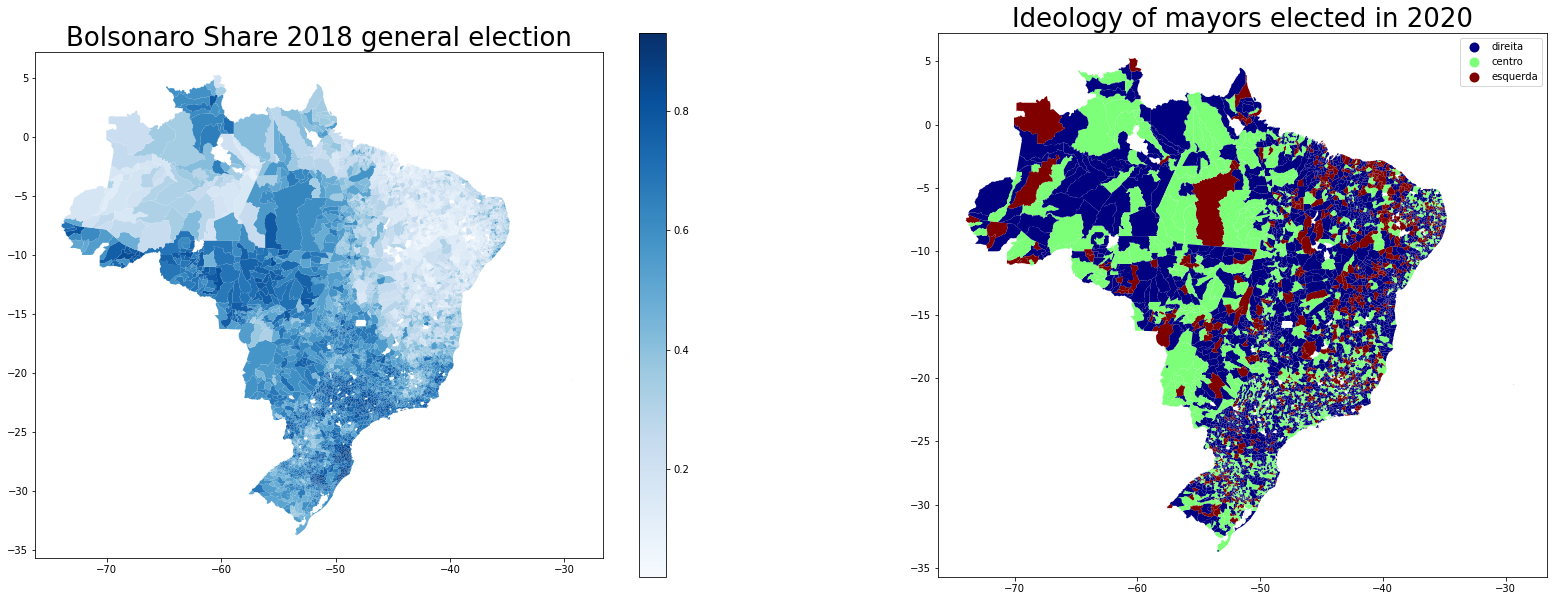

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(28,10))
ax[0].set_title(f'Bolsonaro Share 2018 general election', color='black', size=26)
ax[1].set_title(f'Ideology of mayors elected in 2020', color='black', size=26)

geo_df.plot(column='Bolsonaro_share', legend=True, cmap='Blues', ax=ax[0])
geo_df.plot(column='ELEITO_Espectro', legend=True, cmap='jet', ax=ax[1]);

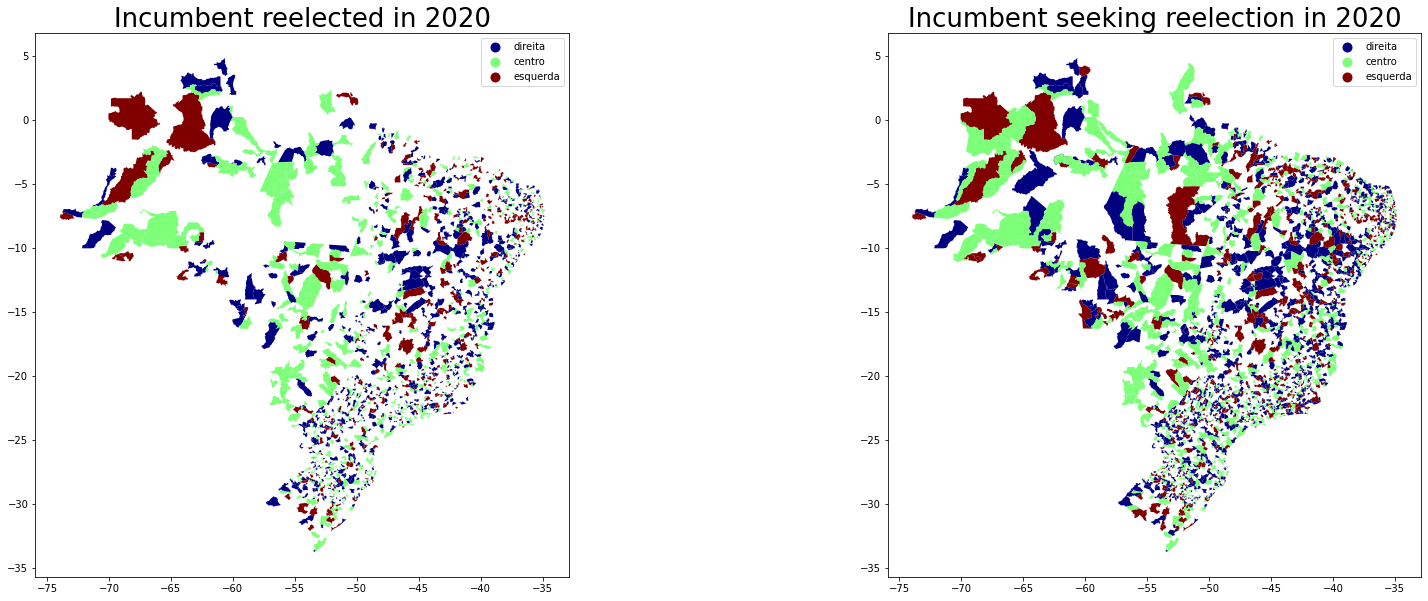

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(28,10))
ax[0].set_title(f'Incumbent reelected in 2020', color='black', size=26)
ax[1].set_title(f'Incumbent seeking reelection in 2020', color='black', size=26)

geo_df[geo_df['INCUMBENTE_REELEITO'] == True].plot(column='INCUMBENTE_Espectro', legend=True, cmap='jet', ax=ax[0])
geo_df[geo_df['INCUMBENTE_CANDIDATO_REELEICAO'] == True].plot(column='INCUMBENTE_Espectro', legend=True, cmap='jet', ax=ax[1]);

In [ ]:
df[df['INCUMBENTE_CANDIDATO_REELEICAO'] == True][['Bolsonaro_share','INCUMBENTE_PERCENTUAL']].describe()

,Bolsonaro_share,INCUMBENTE_PERCENTUAL
count,2759.000000,2759.000000
mean,0.466942,0.546441
std,0.220152,0.125715
min,0.043400,0.157550
25%,0.258909,0.495403
50%,0.501842,0.536260
75%,0.656266,0.588754
max,0.877278,1.000000


In [ ]:
df[df['INCUMBENTE_REELEITO'] == True][['Bolsonaro_share','INCUMBENTE_PERCENTUAL']].describe()

,Bolsonaro_share,INCUMBENTE_PERCENTUAL
count,1687.000000,1687.000000
mean,0.472038,0.554065
std,0.222163,0.127829
min,0.043400,0.157550
25%,0.259169,0.501124
50%,0.508911,0.541623
75%,0.659362,0.598895
max,0.877278,1.000000
